```{contents}
```

# Out-of-Bag (OOB) Evaluation

* In **Random Forest**, each tree is trained on a **bootstrapped sample** of the training data.

* **Bootstrapped sample:** Randomly drawn **with replacement** → some observations appear multiple times, some **don’t appear at all**.

* The observations **not included** in a tree’s training set are called **Out-of-Bag (OOB) samples** for that tree.

**Intuition:**

* These OOB samples act as a **validation set** for that specific tree.
* We can use them to **estimate prediction error without a separate validation set**.

---

## **2. How OOB Evaluation Works**

1. Build a Random Forest with `n_estimators` trees.
2. For each tree, identify its OOB samples.
3. Predict the OOB samples using that tree.
4. For each observation in the training set:

   * Average predictions from **all trees where this observation was OOB**.
5. Compare the averaged prediction to the true value → gives **OOB error estimate**.

---

### **3. Advantages of OOB Evaluation**

| Advantage                             | Explanation                                                                 |
| ------------------------------------- | --------------------------------------------------------------------------- |
| **No separate validation set needed** | Uses unused samples from bootstrapping to estimate error                    |
| **Unbiased error estimate**           | Each observation is tested only on trees that didn’t see it during training |
| **Efficient**                         | Saves time and data (especially with small datasets)                        |
| **Feature importance calculation**    | Can be computed using OOB predictions                                       |

---

### **4. OOB in Regression vs Classification**

* **Regression:**

  * OOB error = Mean Squared Error (MSE) or R² of OOB predictions vs actual values.

* **Classification:**

  * OOB error = Fraction of misclassified OOB samples → similar to test accuracy.

---

### **5. Example Intuition**

* Suppose we have **10 training samples** and build a tree with a bootstrapped sample of size 10.
* Random sampling may pick: `[1, 2, 2, 3, 4, 5, 6, 7, 7, 8]`
* **OOB samples:** `[9, 10]` (not picked in this tree)
* These two samples are used to **validate this tree**.
* Repeat for all trees → average predictions for each sample where it was OOB → overall OOB error.

---

### **6. How to Enable OOB in Scikit-Learn**

```python
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

print("OOB R² score:", rf.oob_score_)
```

**Note:**

* `oob_score_` gives **R² for regression** or **accuracy for classification** using OOB samples.
* Useful for **quick evaluation** without a separate validation set.

---

**Key Takeaways**

1. OOB evaluation is a **built-in cross-validation** mechanism for Random Forest.
2. Provides **unbiased estimate of model performance**.
3. Reduces the need for **extra validation splits**, especially for small datasets.
4. Works for **both regression and classification**.

OOB R² Score: 0.70
Test Set R² Score: 0.78


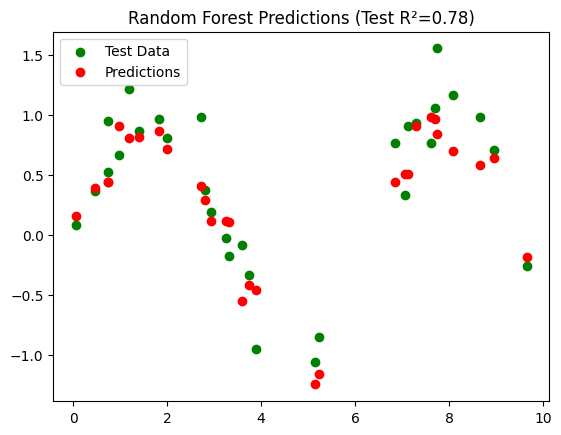

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Create Sample Dataset
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Random Forest with OOB enabled
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

# Step 4: OOB predictions
oob_r2 = rf.oob_score_
y_pred_test = rf.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"OOB R² Score: {oob_r2:.2f}")
print(f"Test Set R² Score: {test_r2:.2f}")

# Step 5: Plot OOB vs Actual
# Note: Scikit-learn doesn't provide direct OOB predictions array easily, so we'll visualize test predictions
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred_test, color='red', label='Predictions')
plt.title(f"Random Forest Predictions (Test R²={test_r2:.2f})")
plt.legend()
plt.show()


### Interpretation

1. **Dataset:** $y = \sin(X) + \text{noise}$, nonlinear regression problem.
2. **Random Forest:**

   * `n_estimators=100` → 100 trees
   * `oob_score=True` → enables OOB evaluation
3. **OOB R²:**

   * Computed using **samples not seen by each tree** during training
   * Provides an **unbiased estimate of model performance**
4. **Test R²:**

   * Computed on a separate test set for comparison
5. **Visualization:**

   * Shows predicted vs actual values on the test set

---

**Key Takeaways**

* OOB evaluation is like **built-in cross-validation**.
* Often, **OOB R² is close to test set R²**, validating the model without splitting data further.
* Very useful when **data is limited** or you want a quick performance check.
